# <center>CS 4331 - Data Mining</center>
## <center>Spring 2020</center>
### <center>Project 1</center>
#### <center>Joshua Ball | Dipendra Yadav</center>

In [1]:
# Importing the libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Reading the data and displaying the first 5 rows
dataset = pd.read_csv("hotel_bookings.csv")
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Problem Understanding Phase


### Problem Objective
    Traveling is expensive overall, but one of the biggest costs associated with a trip is often the lodging.
    Studies have suggested that the best time to buy a plane ticket for lower-price options is 70 days in advance.
    But does the same reasoning apply to hotel rooms?

### Can this problem be solved using Data Science?
    We are using data from https://www.kaggle.com/ekretsch/hotel-booking-dataset to develop a clustering algorithm 
    that can find out the best time of the year to book a hotel room in order to get best prices in the market.

## Data Preparation Phase
    Preparing the data for analysis


In [3]:
# Checking for null values and datatypes of each attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
""" Here we can see that data has int, float and object values. First of all we have to represent the object
    values to some numerical values so that we can perform exploratory data analysis. Also, we have to fix
    the NaN values present in the dataset."""

' Here we can see that data has int, float and object values. First of all we have to represent the object\n    values to some numerical values so that we can perform exploratory data analysis. Also, we have to fix\n    the NaN values present in the dataset.'

In [5]:
# Just a plot function
def plotter():
    plt.figure(figsize=(30, 16))
    sns.set(font_scale=1.4)

In [6]:
# Cleaning the dataset (looking for outliers and NaN values)
data_size = dataset.shape
print('The size of the dataset is {}'.format(data_size))


# Checking for NaNs in the dataset
print('The attributes with NaNs are as follows:')
NaNs = pd.DataFrame(dataset.isnull().sum())
NaNs

The size of the dataset is (119390, 32)
The attributes with NaNs are as follows:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


    Here we can see there are so many instances in attributes in country, agent, and company that carries NaNs. For this project, country, agent, and company columns do not add up to the value or contribute to the fluctuation in the pricing over the year. Therefore, we are going to drop these two columns. However, We would have needed to do some interpolation to fill in these values in the data preparation phase of data mining in case these attributes were important in the formation of clusters for this project.

In [7]:
dataset = dataset.drop(columns = ['country','agent', 'company','children'])

# Validation of the dataset 
print('The cleaned dataset without NaNs are as follows:')
new_data = pd.DataFrame(dataset.isnull().sum())
new_data

The cleaned dataset without NaNs are as follows:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
# Now lets check how the data is distributed statistically
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# Checking the number of instances in each month to have a general idea of when people travel most
dataset.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

From above data we can see that the months of August followed by July, May, and October has the most travellers.

To use linear regression for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

Text(0.5, 1, 'Correlation Heatmap')

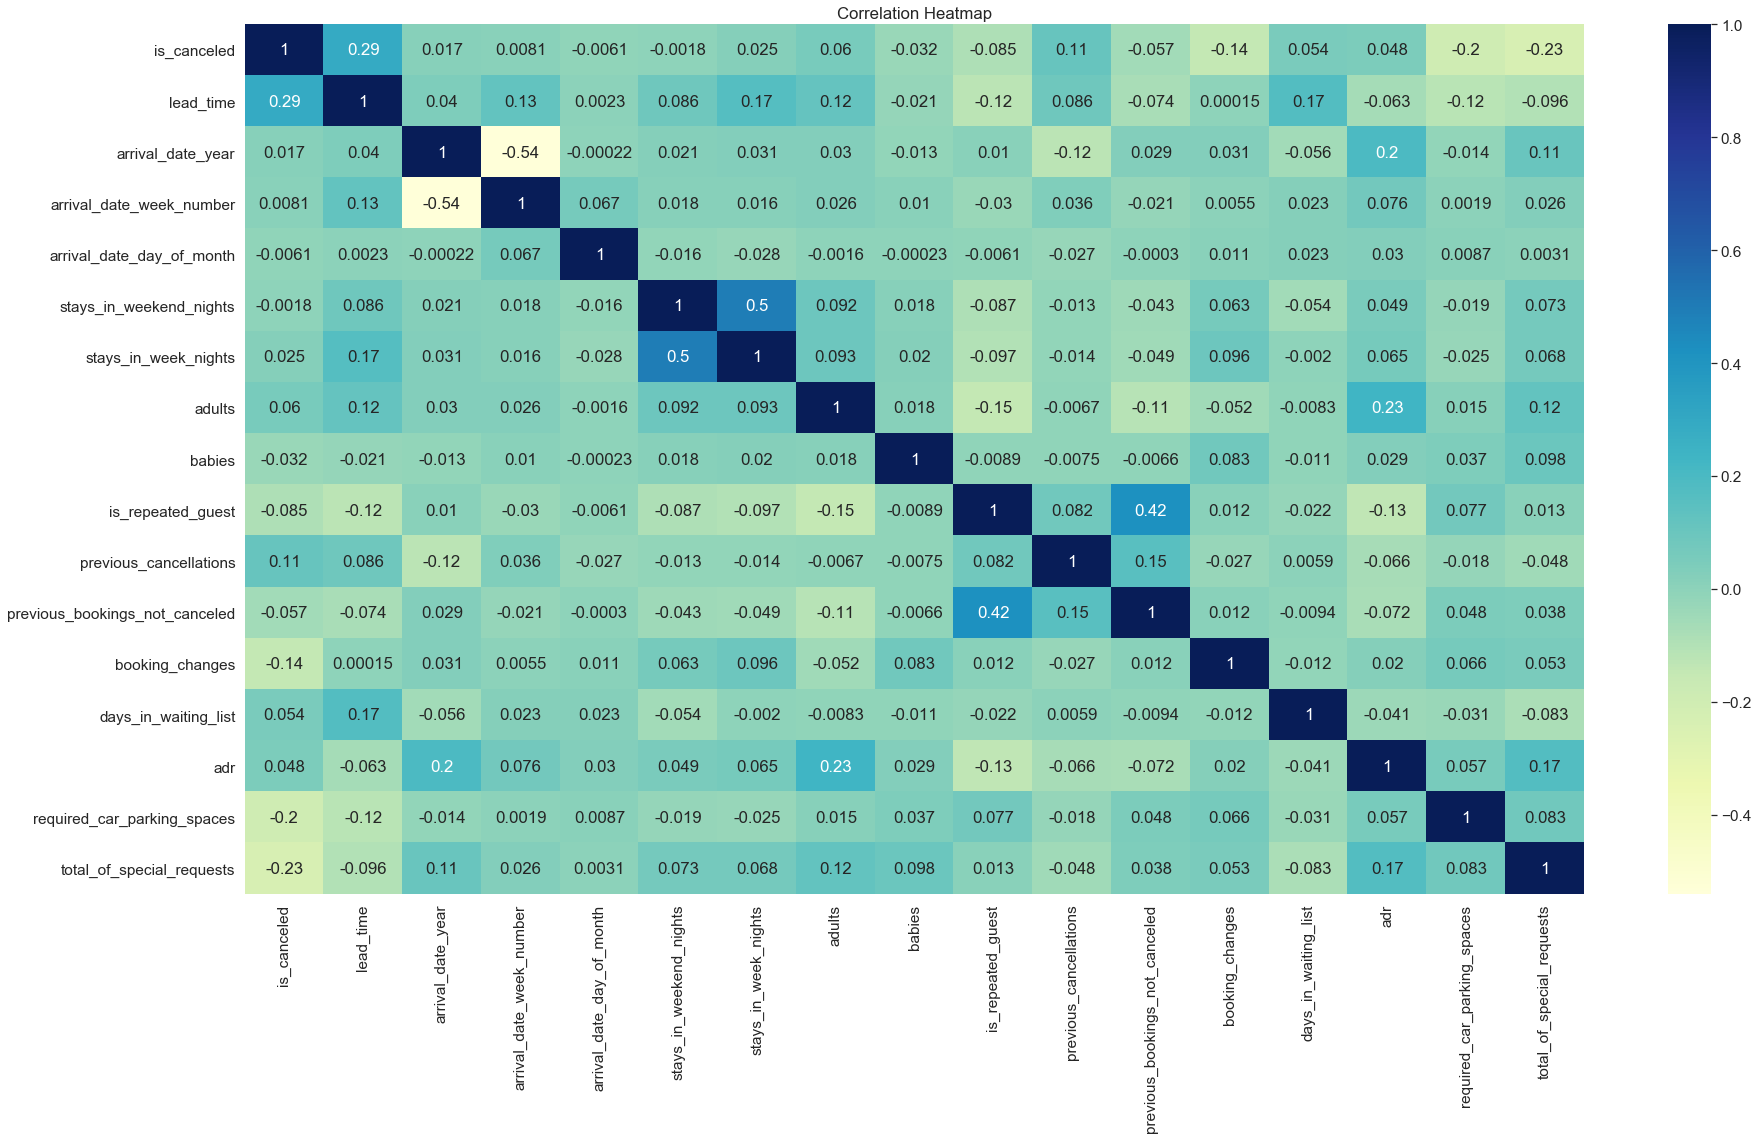

In [10]:
# Representing the data using heatmap before correction
plotter()
data_corr = dataset.corr()
sns.heatmap(data_corr,annot = True,cmap = "YlGnBu")
plt.title('Correlation Heatmap')


In [11]:
#Calculating average rate paid per total stay by multiplying average daily rate * total time stayed
dataset['rate_per_stay'] = dataset['adr'] * (dataset['stays_in_weekend_nights'] + dataset['stays_in_week_nights'])

In [12]:
rate_per_stay = dataset['rate_per_stay']
adr = dataset['adr']
month = dataset['arrival_date_month']
day = dataset['arrival_date_day_of_month']
year = dataset['arrival_date_year']
week = dataset['arrival_date_week_number']



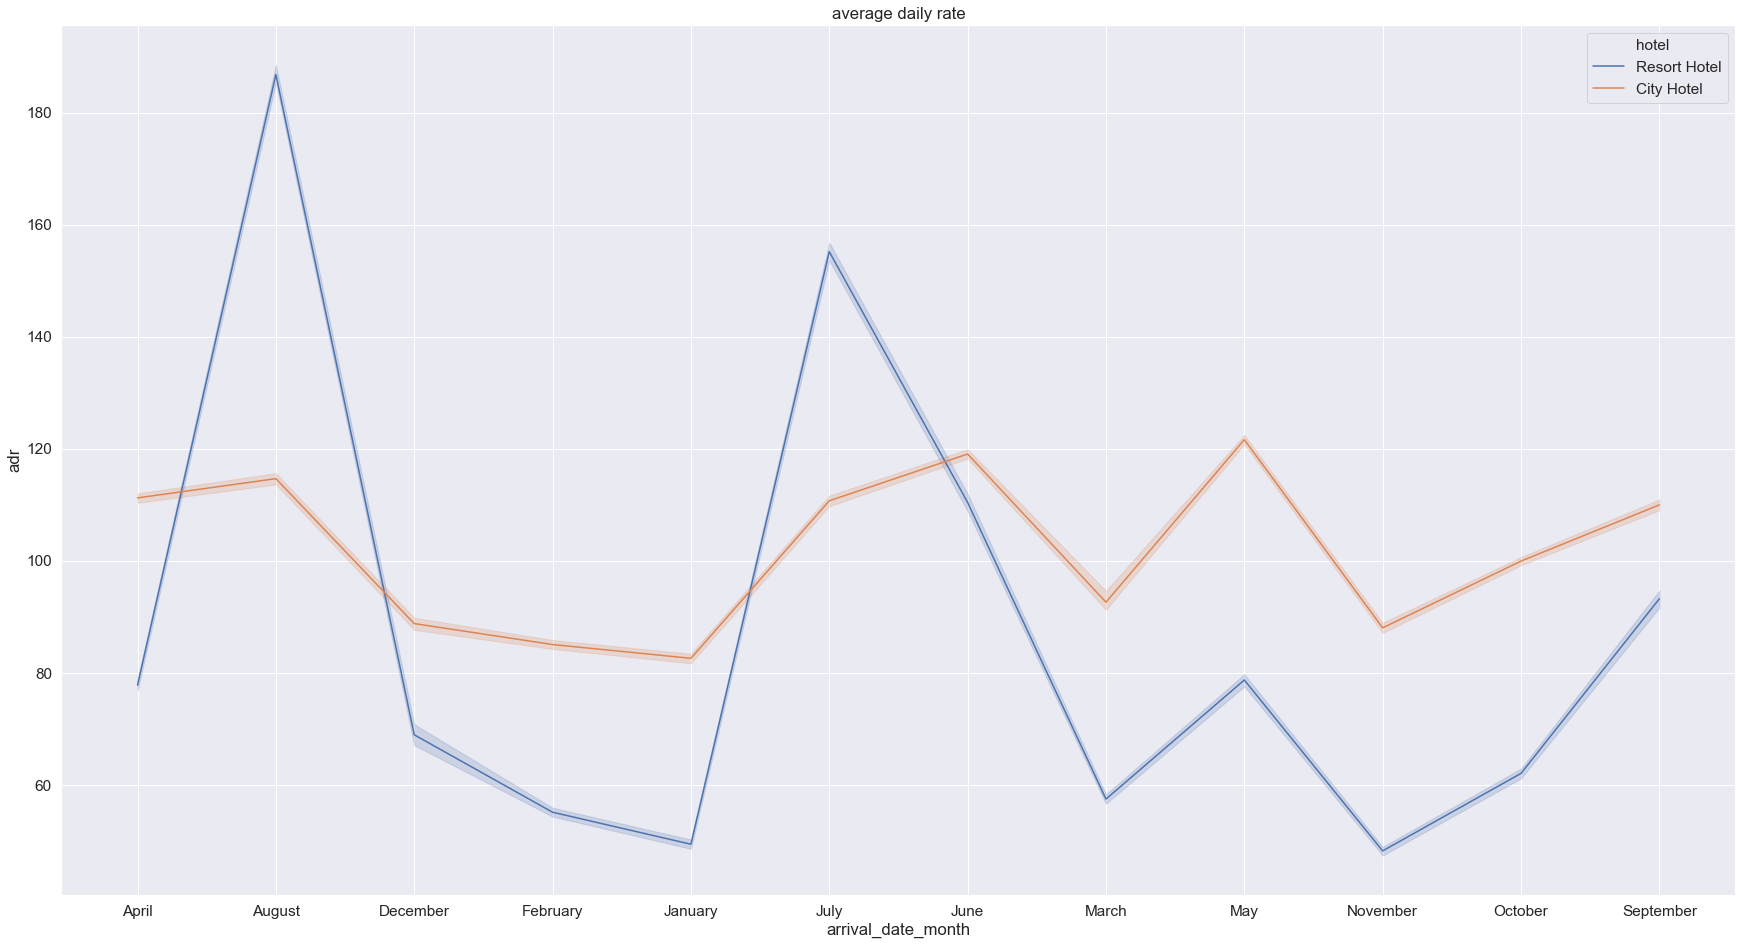

Text(0.5, 1.0, 'rate_per_stay')

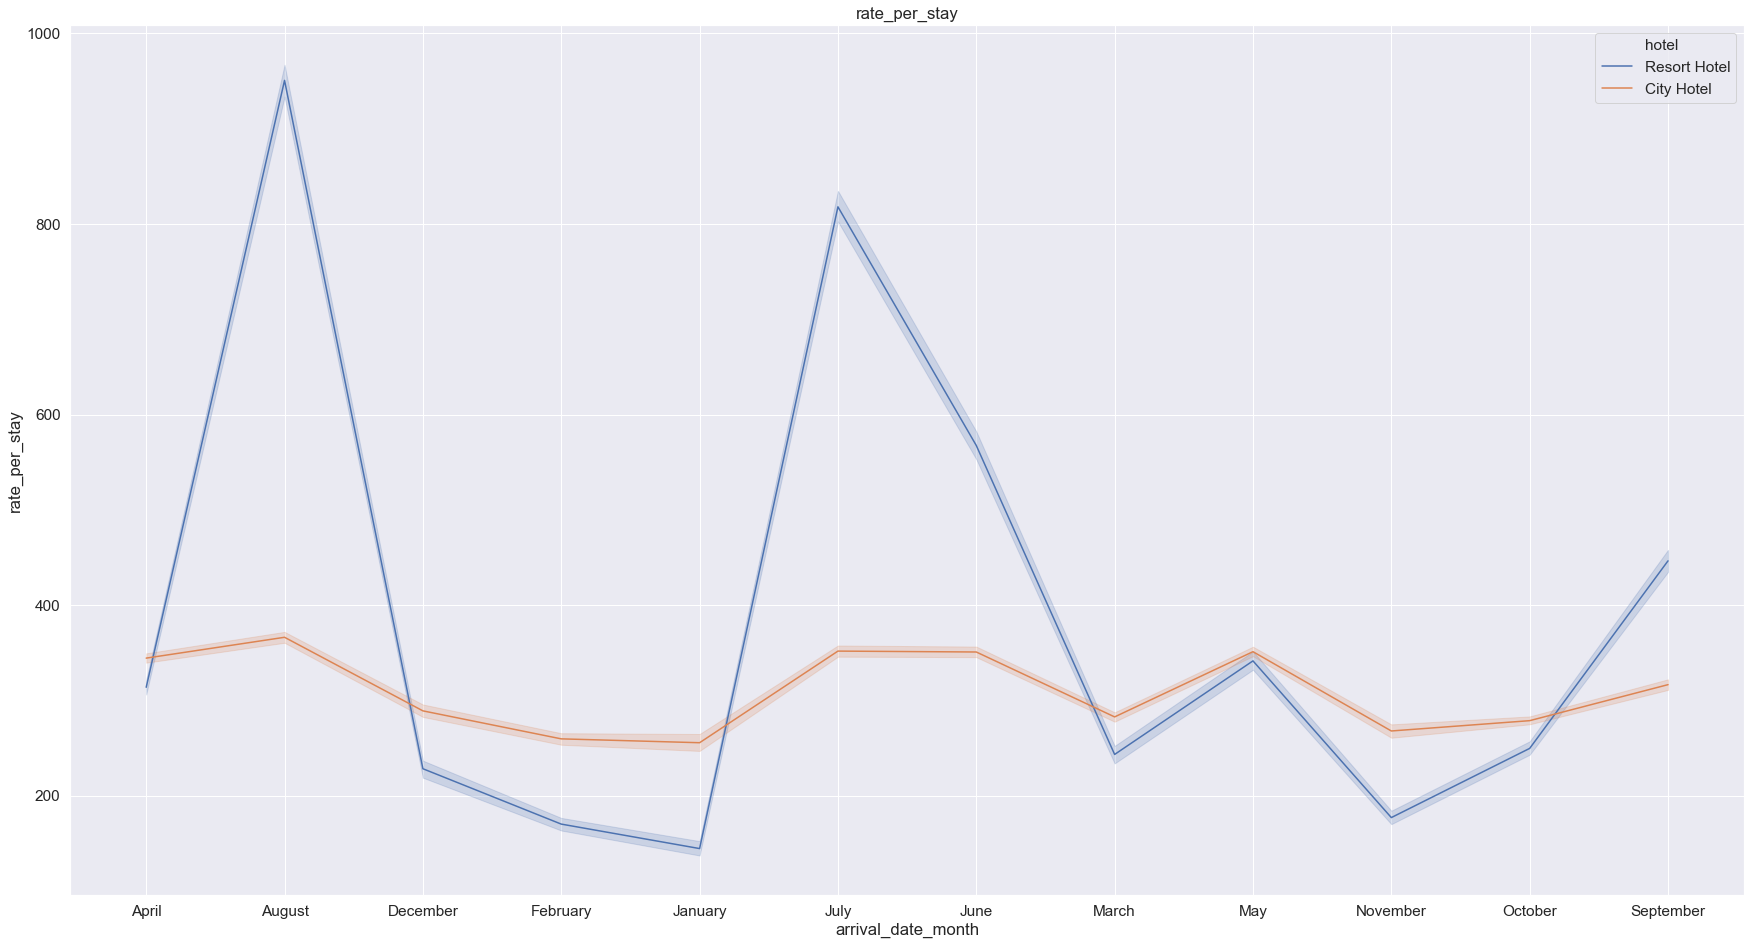

In [13]:
plotter()
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title("average daily rate")
plt.show()
plotter()
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'rate_per_stay', hue = 'hotel').set_title("rate_per_stay")    

In [14]:
#Graphs show a clear trend where certian months have a higher overall price paid and adr

In [15]:
#Changing months from str -> int so it is no longer categorical and can be used in clustering model
#Code isn't working inside Jupyter but works in a regular environment so we will just read in a new corrected file.

#month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,
             #'September':9,'October':10,'November':11,'December':12}
#dataset['arrival_date_month'] = dataset['arrival_date_month'].map(month_map)
dataset = pd.read_csv("hotel_bookings_month_corrected.csv")

Text(0.5, 1, 'Correlation Heatmap after correction')

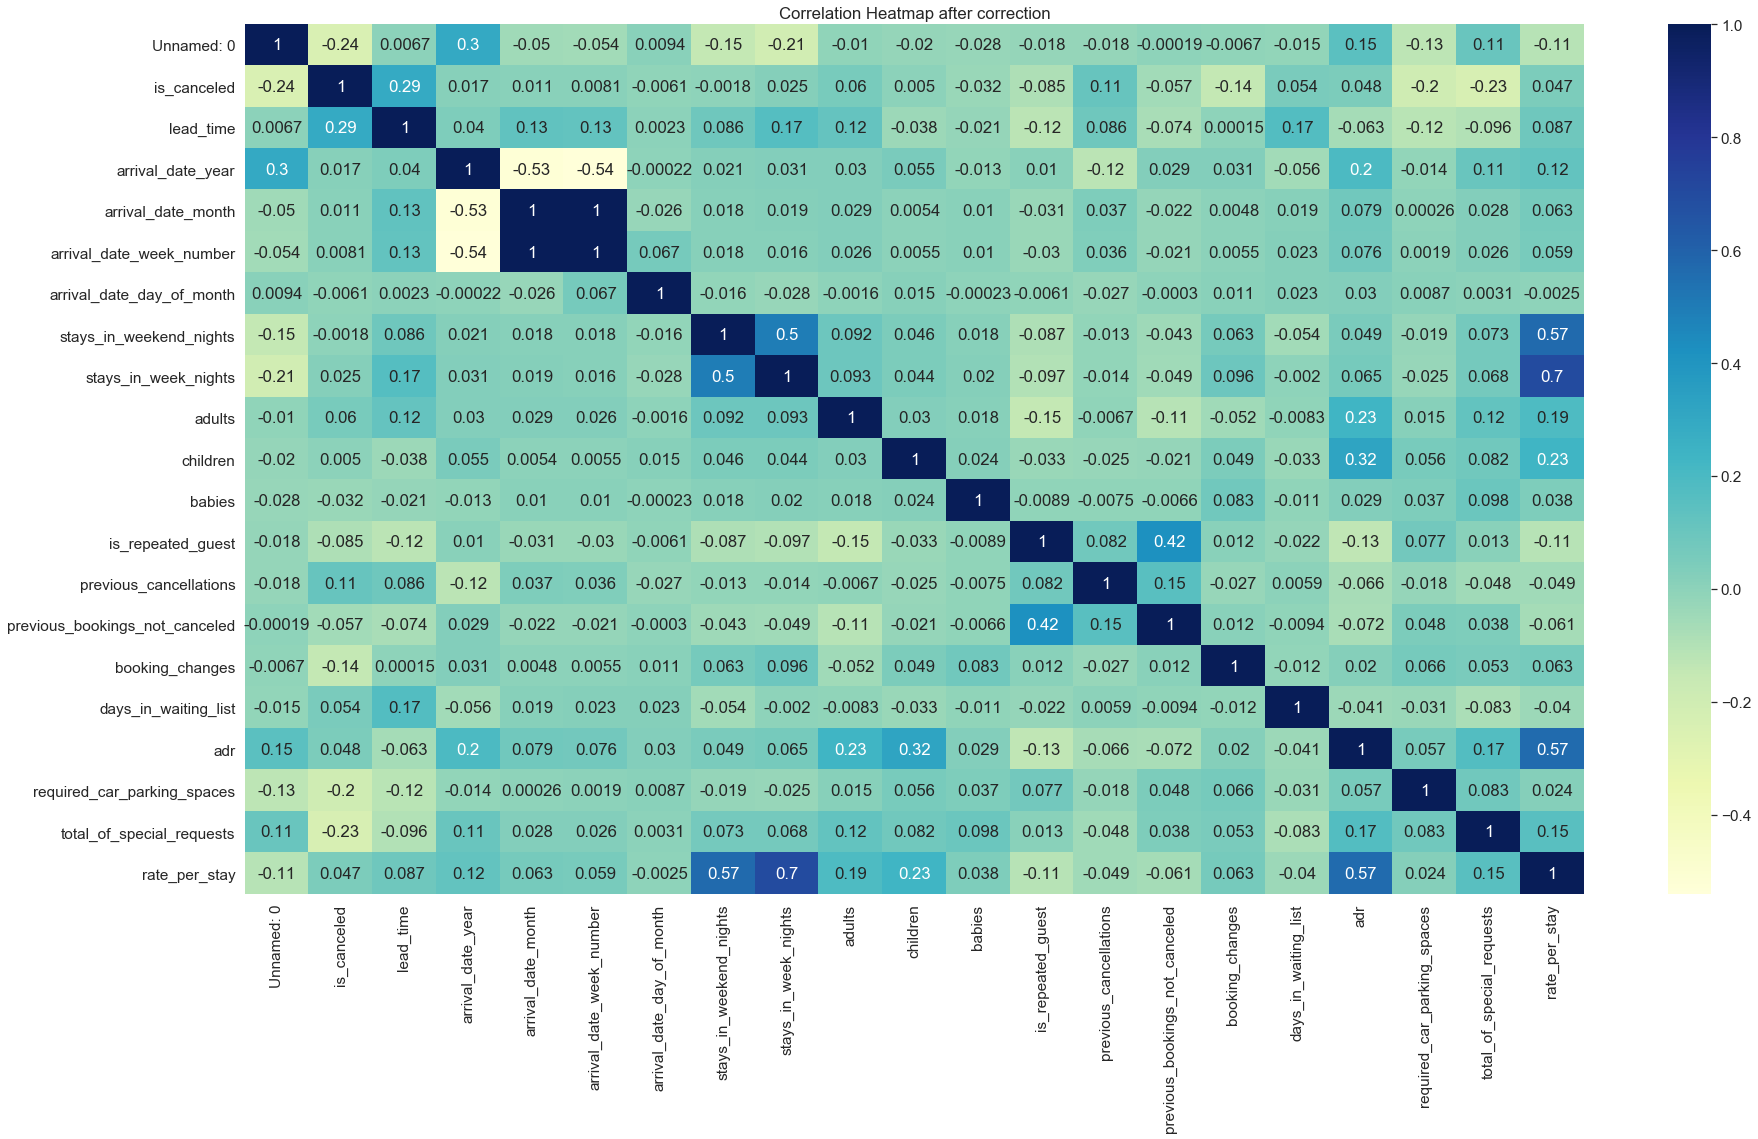

In [16]:
# Representing the data using heatmap after correction
plotter()
data_corr = dataset.corr()
sns.heatmap(data_corr,annot = True,cmap = "YlGnBu")
plt.title('Correlation Heatmap after correction')


        ==> Dark shades represents positive correlation while lighter shades represents negative correlation.
    Here we can infer that “arrival_date_month” has strong positive correlation with “arrival_date_week_number” whereas it has strong negative correlation with “arrival_date_year”. Furthermore,
    if correlation is zero we can infer there is no linear relationship between these two predictors and it is safe to drop these features in case we will be applying Linear Regression model to the dataset.

In [17]:
#Next we are removing cases where the customer canceled their reservations
dataset.loc[dataset['is_canceled'] == 1] = np.NaN #Replace row with NaN if it was canceled
dataset = dataset.dropna(); #Remove NaN rows
dataset.reset_index(drop=True);

Text(0.5, 1.0, 'Cleaned rate per stay')

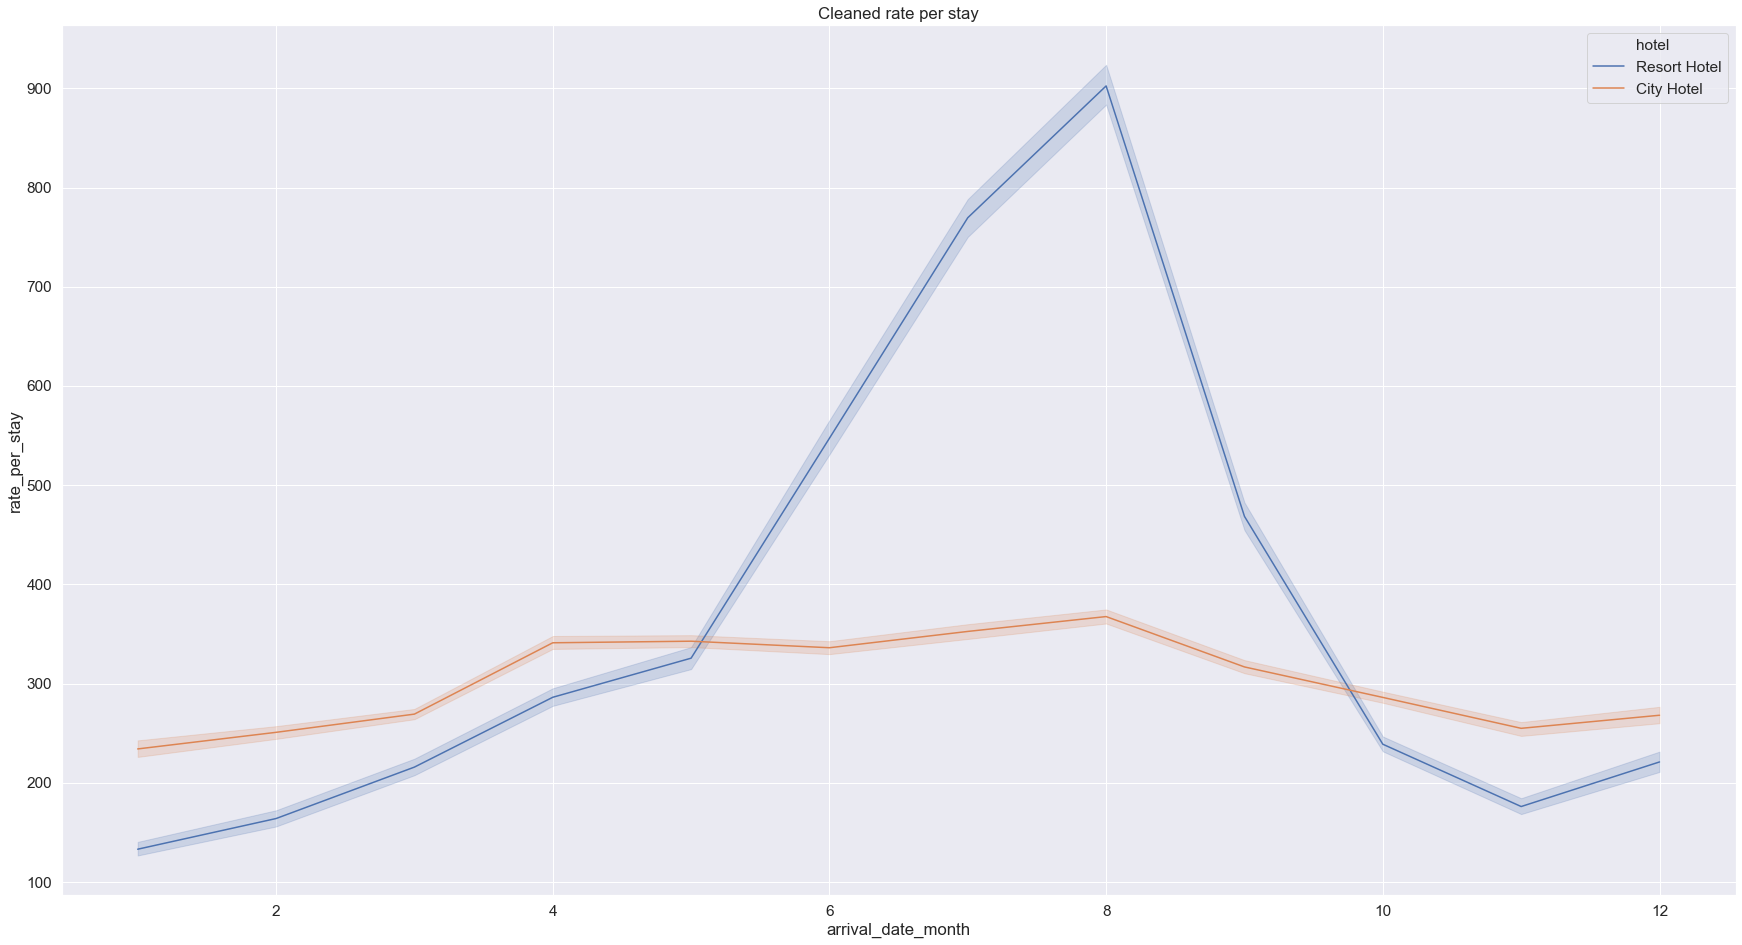

In [18]:
plt.figure(figsize=(30, 16))
sns.set(font_scale=1.4)
sns.lineplot(data = dataset, x = 'arrival_date_month', y = 'rate_per_stay', hue = 'hotel').set_title("Cleaned rate per stay")    
#Huge peak in summer months, which is to be expected.

In [19]:
def clusterMonth(RATE):
    X_month = dataset[[RATE,'arrival_date_month']]
    Xz_month = pd.DataFrame(stats.zscore(X_month),columns=[RATE,'arrival_date_month'])
    kmeans_month = KMeans(n_clusters=2).fit(Xz_month)
    cluster_month = kmeans_month.labels_
    Cluster1_month = Xz_month.loc[cluster_month  == 0]
    Cluster2_month = Xz_month.loc[cluster_month  == 1]
    print(Cluster1_month.describe())
    print(Cluster2_month.describe())
    return Cluster1_month, Cluster2_month

In [20]:
clusters = clusterMonth('rate_per_stay')

       rate_per_stay  arrival_date_month
count   34137.000000        34137.000000
mean       -0.296816           -0.919234
std         0.553537            0.513816
min        -1.268863           -1.752439
25%        -0.736726           -1.435333
50%        -0.389815           -0.801122
75%         0.007585           -0.484016
max         4.605089            0.150196
       rate_per_stay  arrival_date_month
count   41029.000000        41029.000000
mean        0.246957            0.764822
std         1.201183            0.569537
min        -1.071248           -1.752439
25%        -0.544686            0.467301
50%        -0.117242            0.784407
75%         0.650919            1.101513
max        22.438189            1.735724


In [21]:
#Validating cluster results by running k-means clustering on test data set
dataset_test = dataset
X_test = dataset_test[['rate_per_stay','arrival_date_month']]
Xz_test = pd.DataFrame(stats.zscore(X_test),columns=['rate_per_stay','arrival_date_month'])

In [22]:
kmeans_test = KMeans(n_clusters=2).fit(Xz_test)
cluster_test =kmeans_test.labels_
Cluster1_test = Xz_test.loc[cluster_test == 0]
Cluster2_test = Xz_test.loc[cluster_test == 1]
print(Cluster1_test.describe())
print(Cluster2_test.describe())

       rate_per_stay  arrival_date_month
count   34138.000000        34138.000000
mean       -0.296829           -0.919203
std         0.553534            0.513841
min        -1.268863           -1.752439
25%        -0.736726           -1.435333
50%        -0.389815           -0.801122
75%         0.007585           -0.484016
max         4.605089            0.150196
       rate_per_stay  arrival_date_month
count   41028.000000        41028.000000
mean        0.246981            0.764837
std         1.201188            0.569536
min        -1.071248           -1.752439
25%        -0.544686            0.467301
50%        -0.117242            0.784407
75%         0.650919            1.101513
max        22.438189            1.735724


In [23]:
#Clustering results of data set vs test data set looks great

In [24]:
def bar_plotter(x):
    sns.set(style="whitegrid")
    plt.figure(figsize=(30, 16))
    sns.set(font_scale=1.4)
    ax = sns.barplot(x, adr)

Text(0.5, 1.0, 'Average Daily Rates vs Day of the Month')

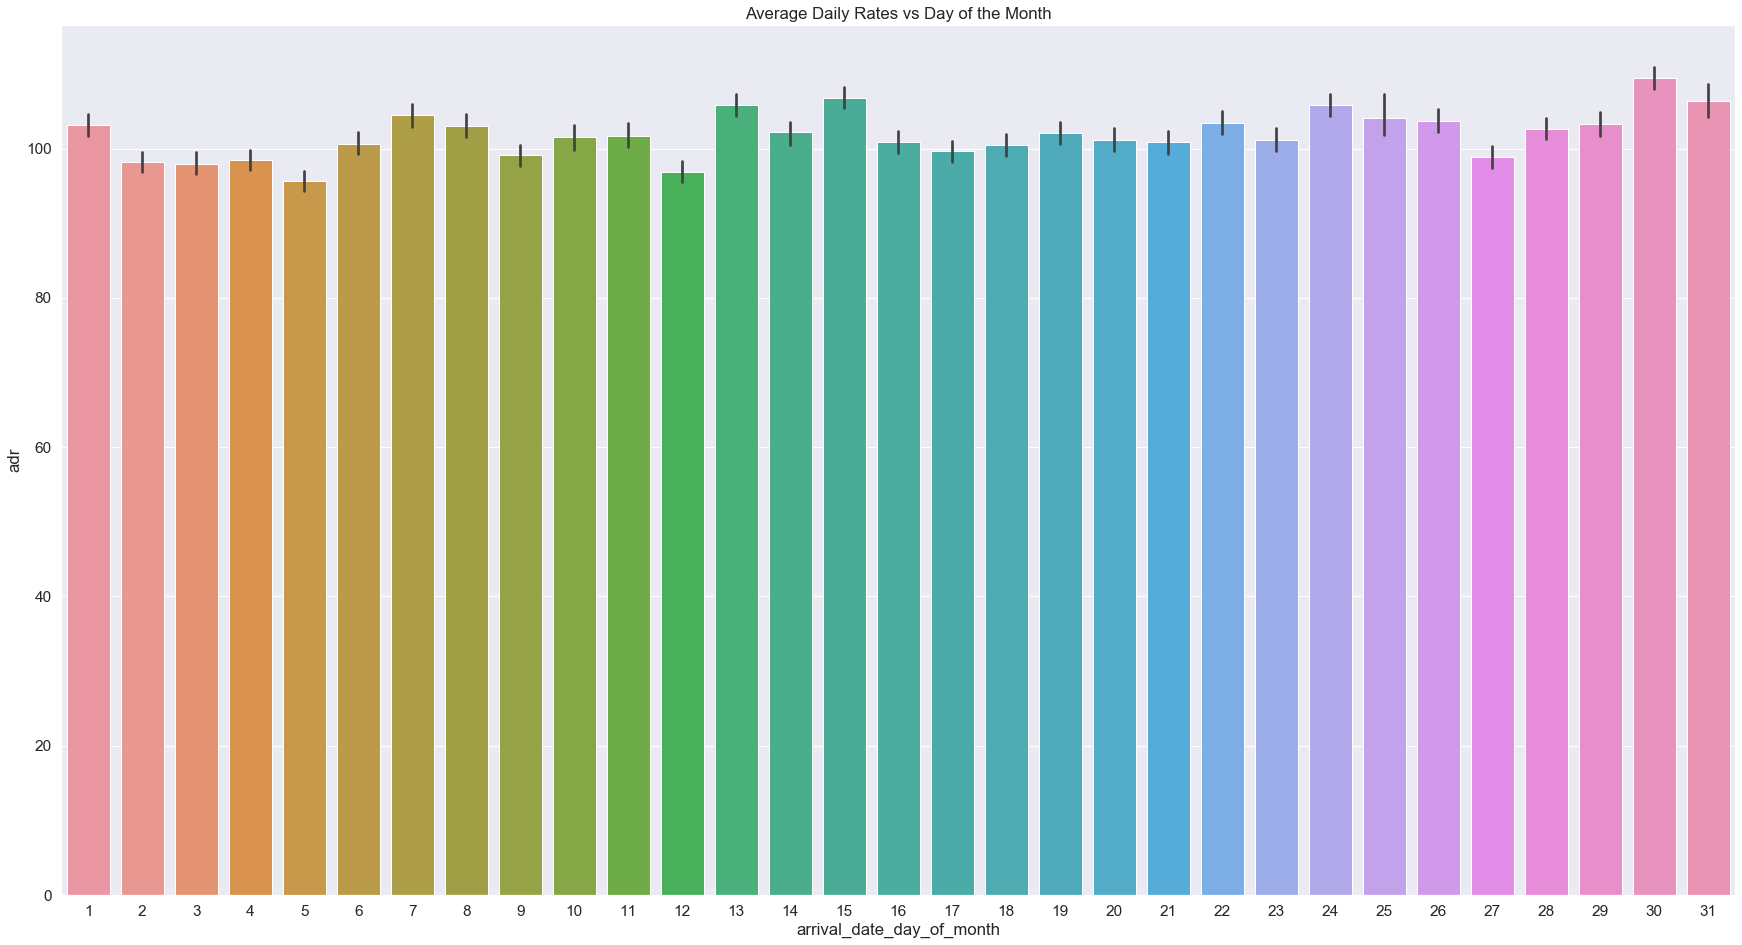

In [25]:
# Plotting the rate_per_stay with respect to days
bar_plotter(day)
plt.title('Average Daily Rates vs Day of the Month')


Text(0.5, 1.0, 'Average Daily Rates vs Weeks of the Year')

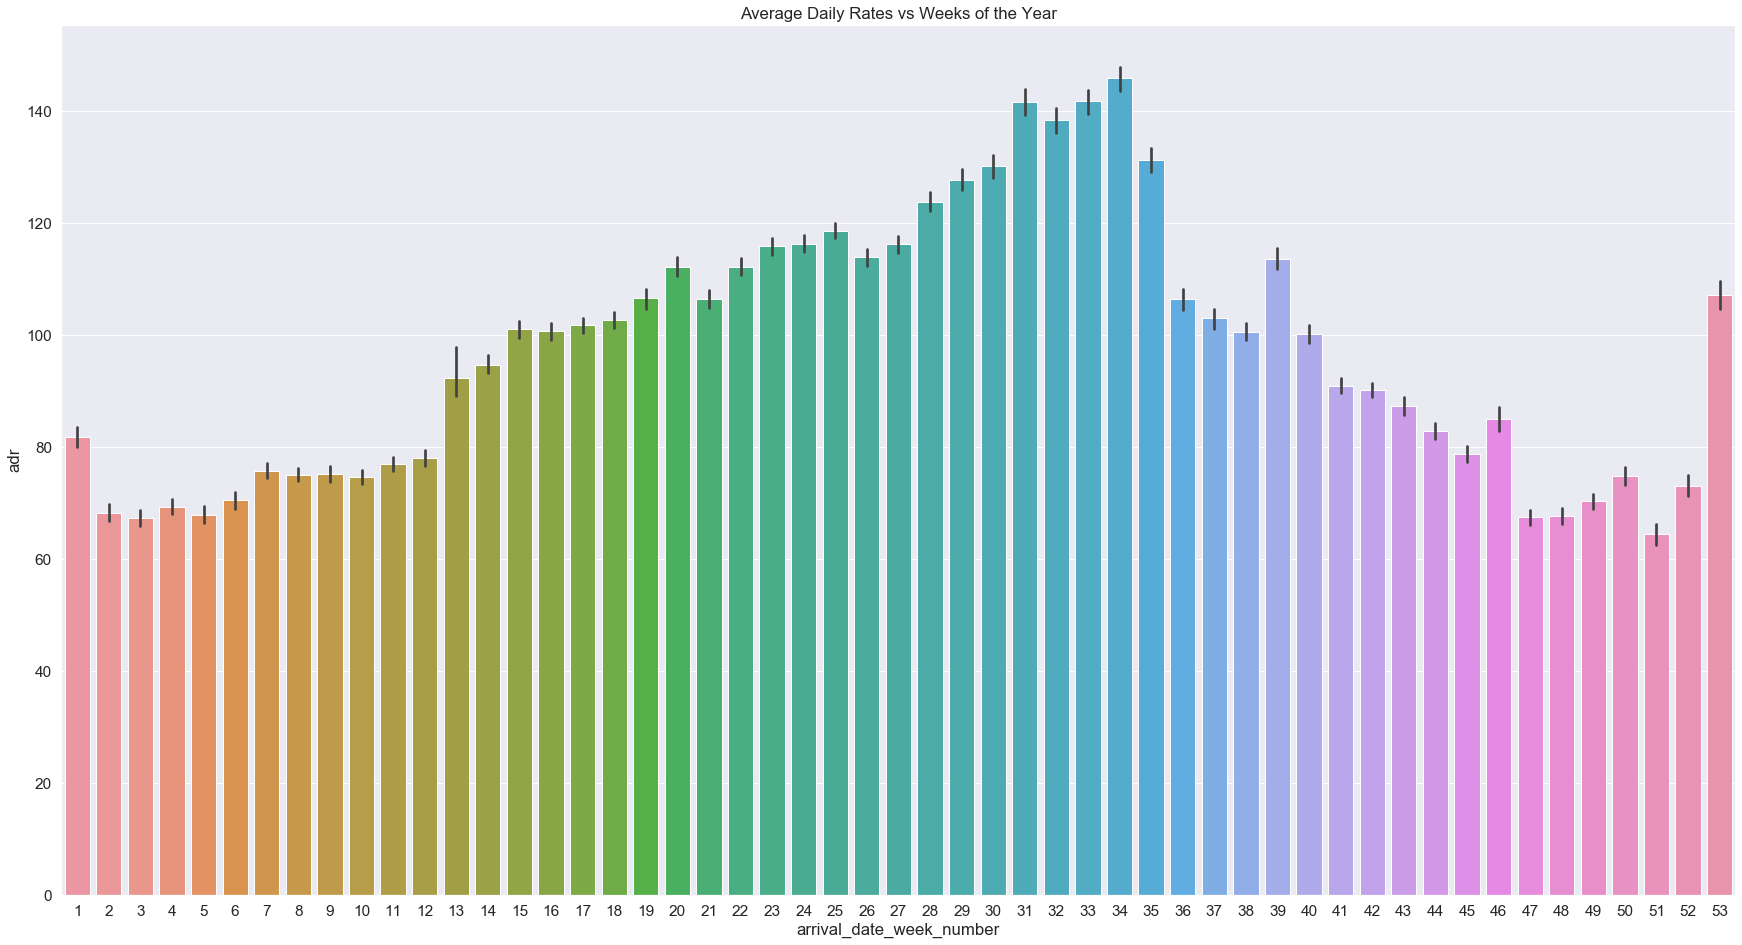

In [26]:
# Plotting the rate_per_stay with respect to weeks
bar_plotter(week)
plt.title('Average Daily Rates vs Weeks of the Year')

Text(0.5, 1.0, 'Average Daily Rates vs Months of the Year')

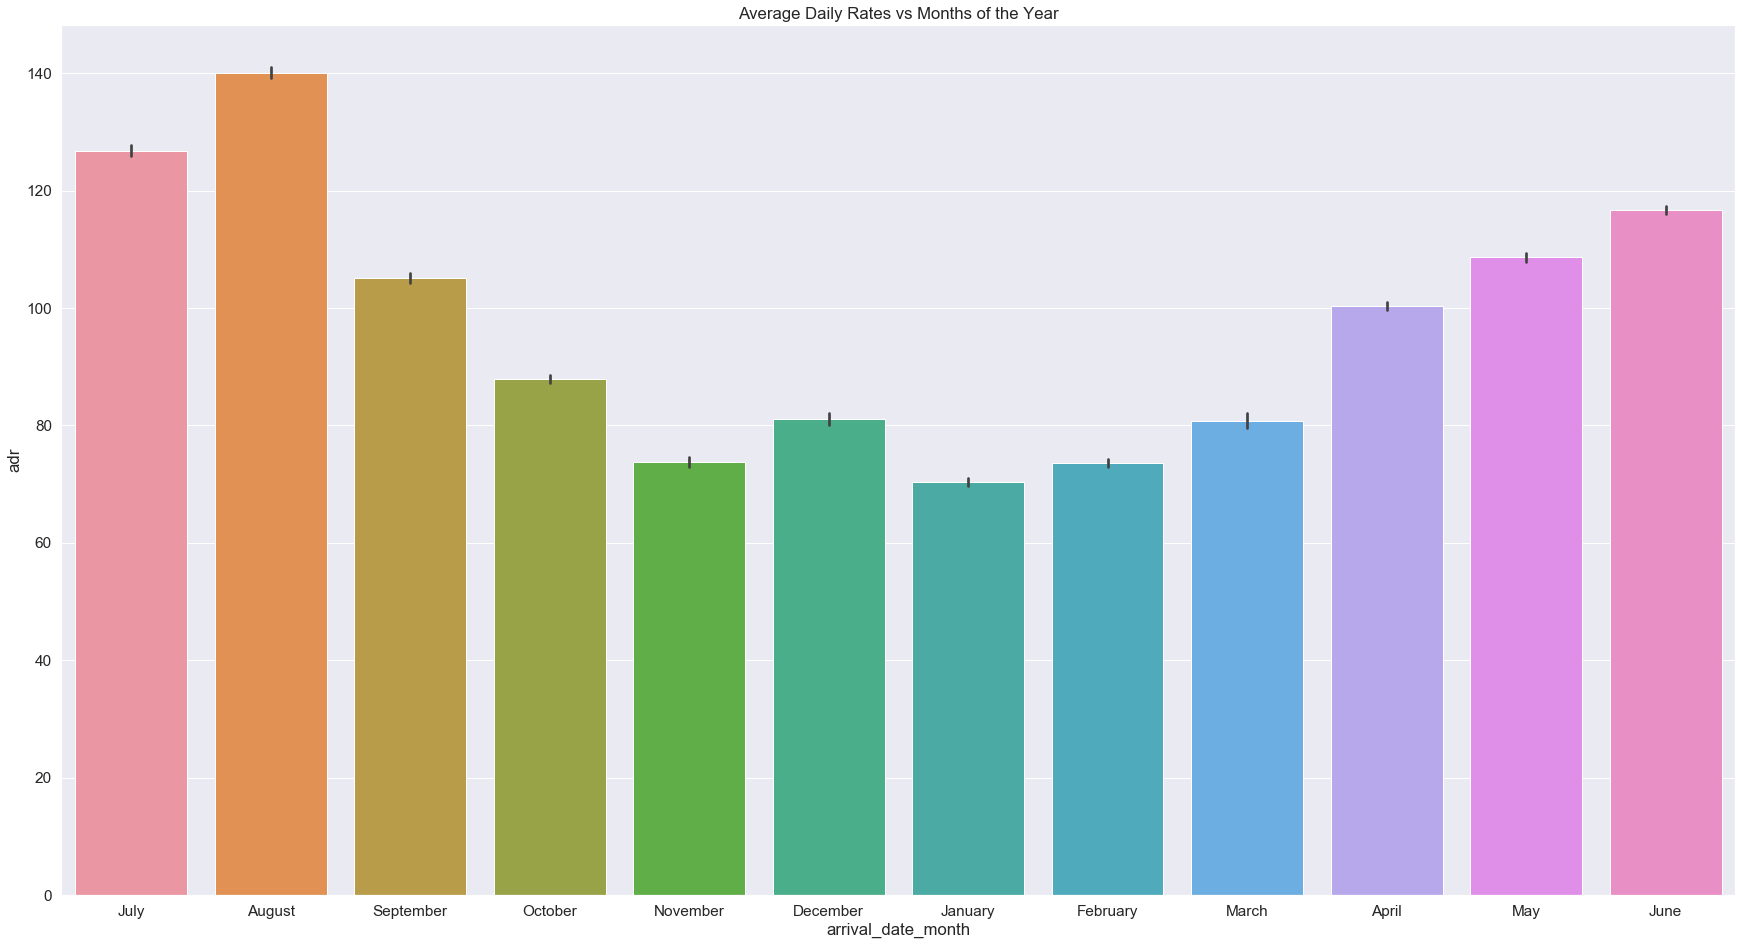

In [27]:
# Plotting the rate_per_stay with respect to months
bar_plotter(month)
plt.title('Average Daily Rates vs Months of the Year')


Text(0.5, 1.0, 'Average Daily Rates vs Years')

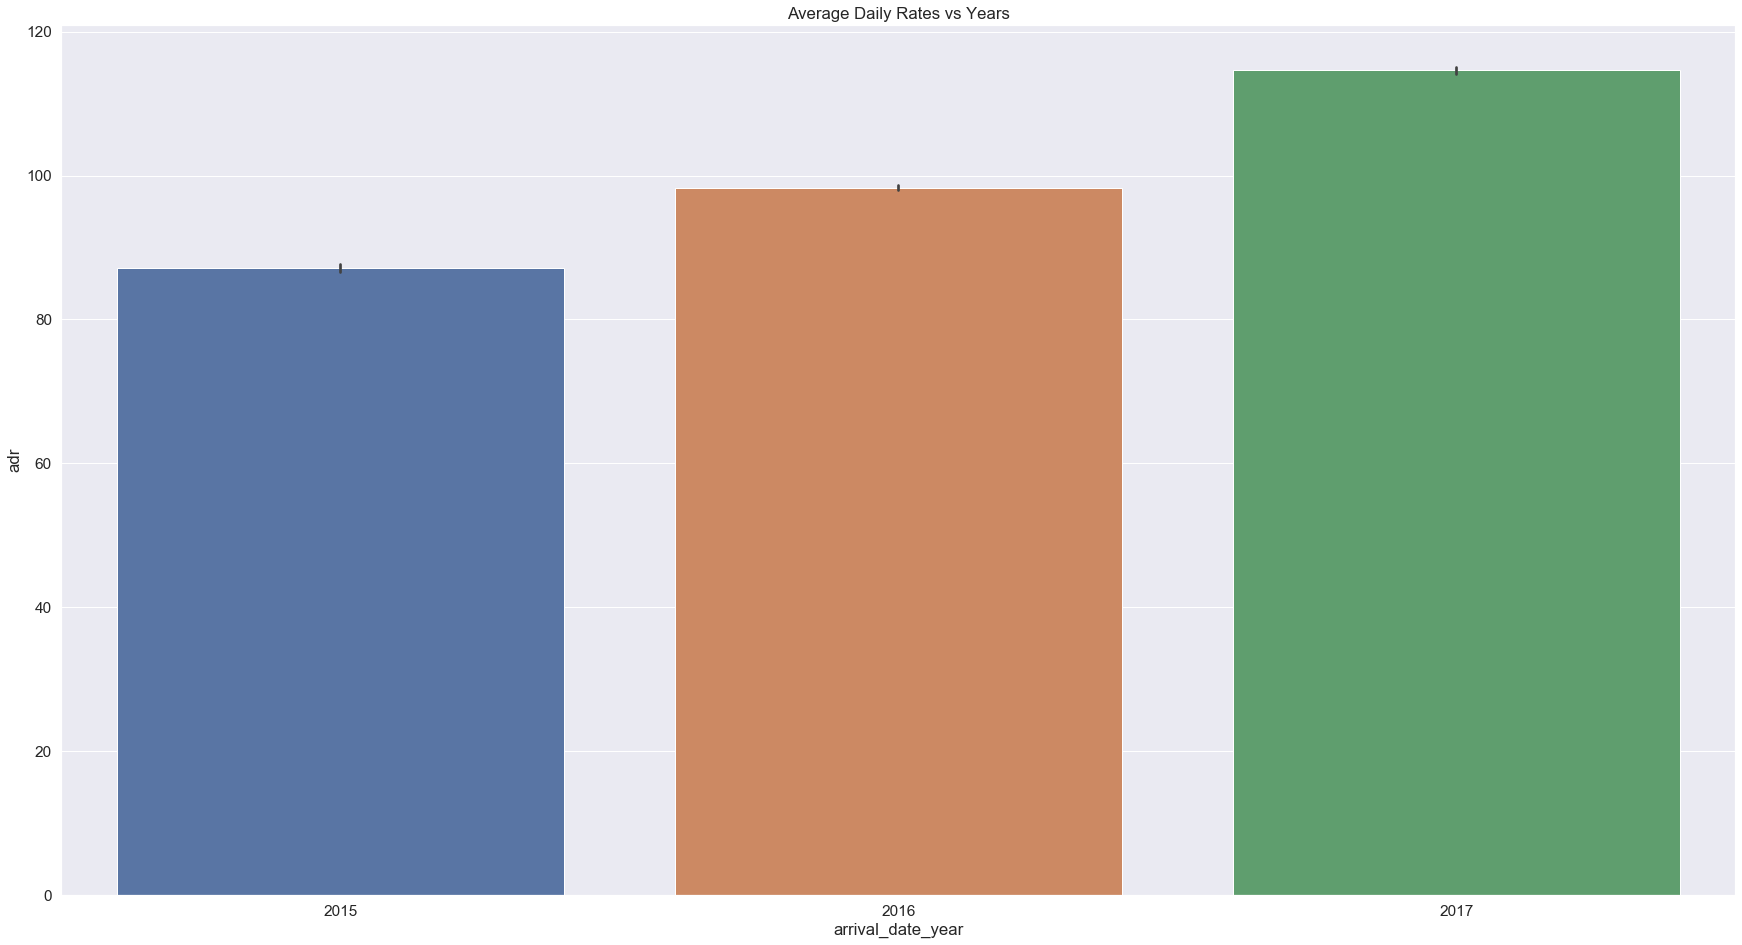

In [28]:
# Plotting the rate_per_stay with respect to years
bar_plotter(year)
plt.title('Average Daily Rates vs Years')

In [29]:
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
resort_hotel = dataset.loc[(dataset["hotel"] == "Resort Hotel") & (dataset["is_canceled"] == 0)]
city_hotel = dataset.loc[(dataset["hotel"] == "City Hotel") & (dataset["is_canceled"] == 0)]

In [30]:
resort_guests_monthly = resort_hotel.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city_hotel.groupby("arrival_date_month")["hotel"].count()

In [31]:
# finding the number of guests per month in each hotel type
resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

Text(0.5, 1.0, 'Guests per Month')

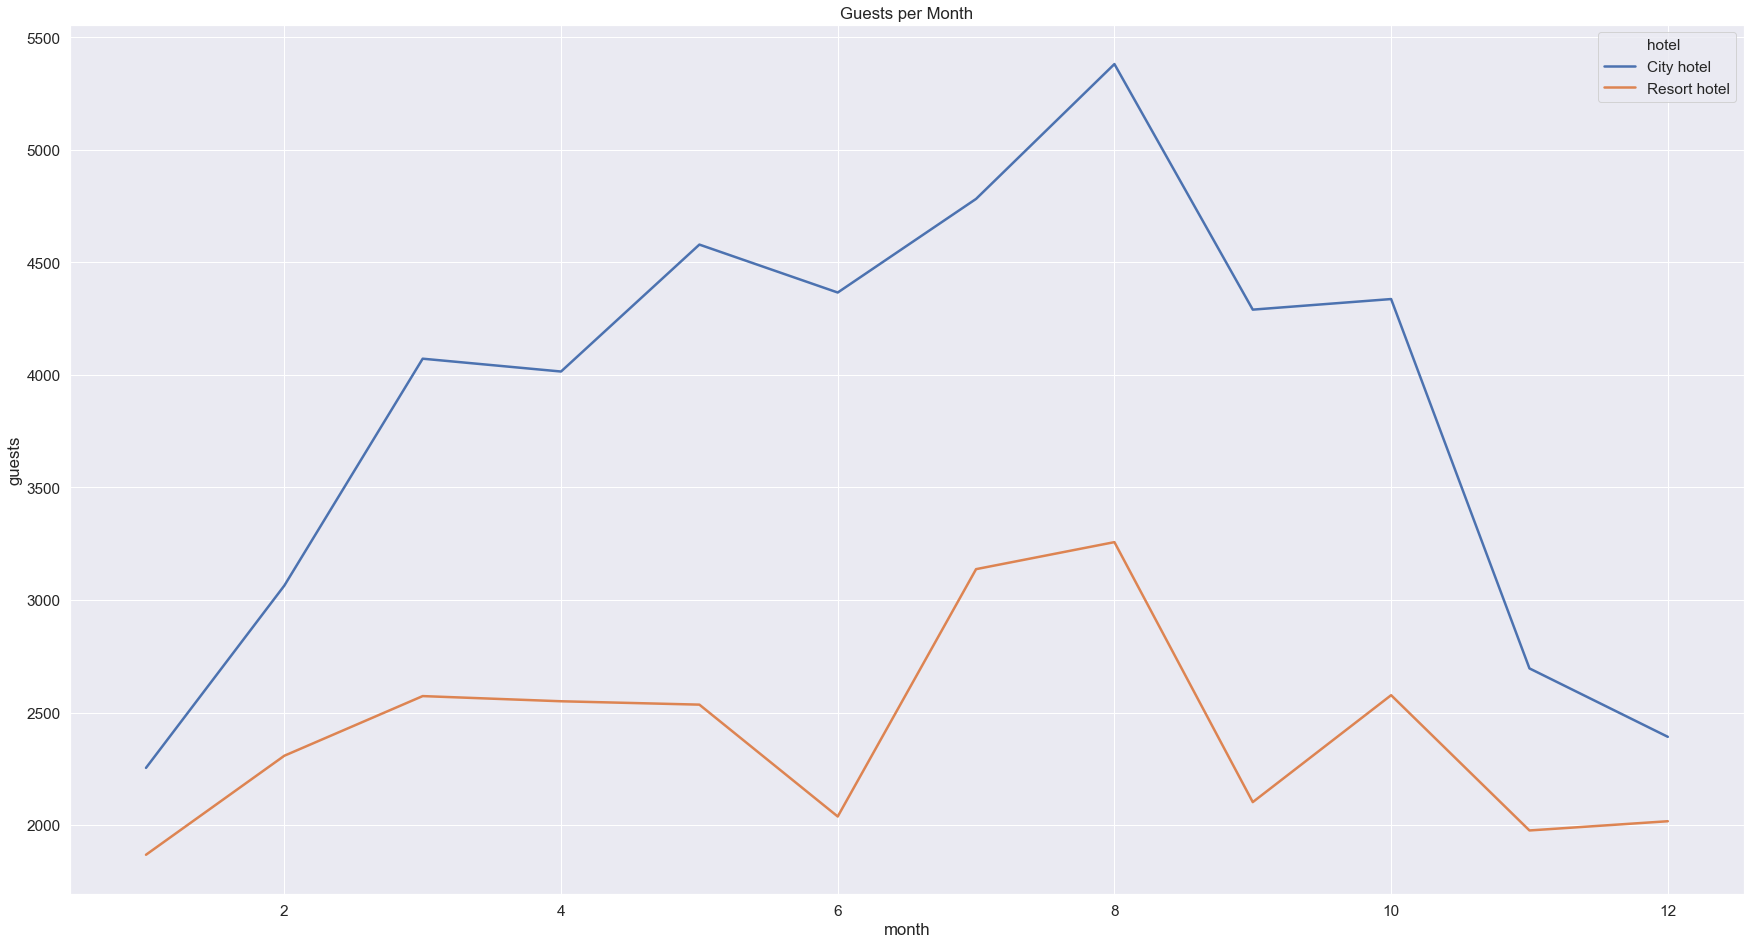

In [32]:
# Plotting the data above to visualize the distribution
plotter()
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title('Guests per Month')

Text(0.5, 1.0, 'Guests per month')

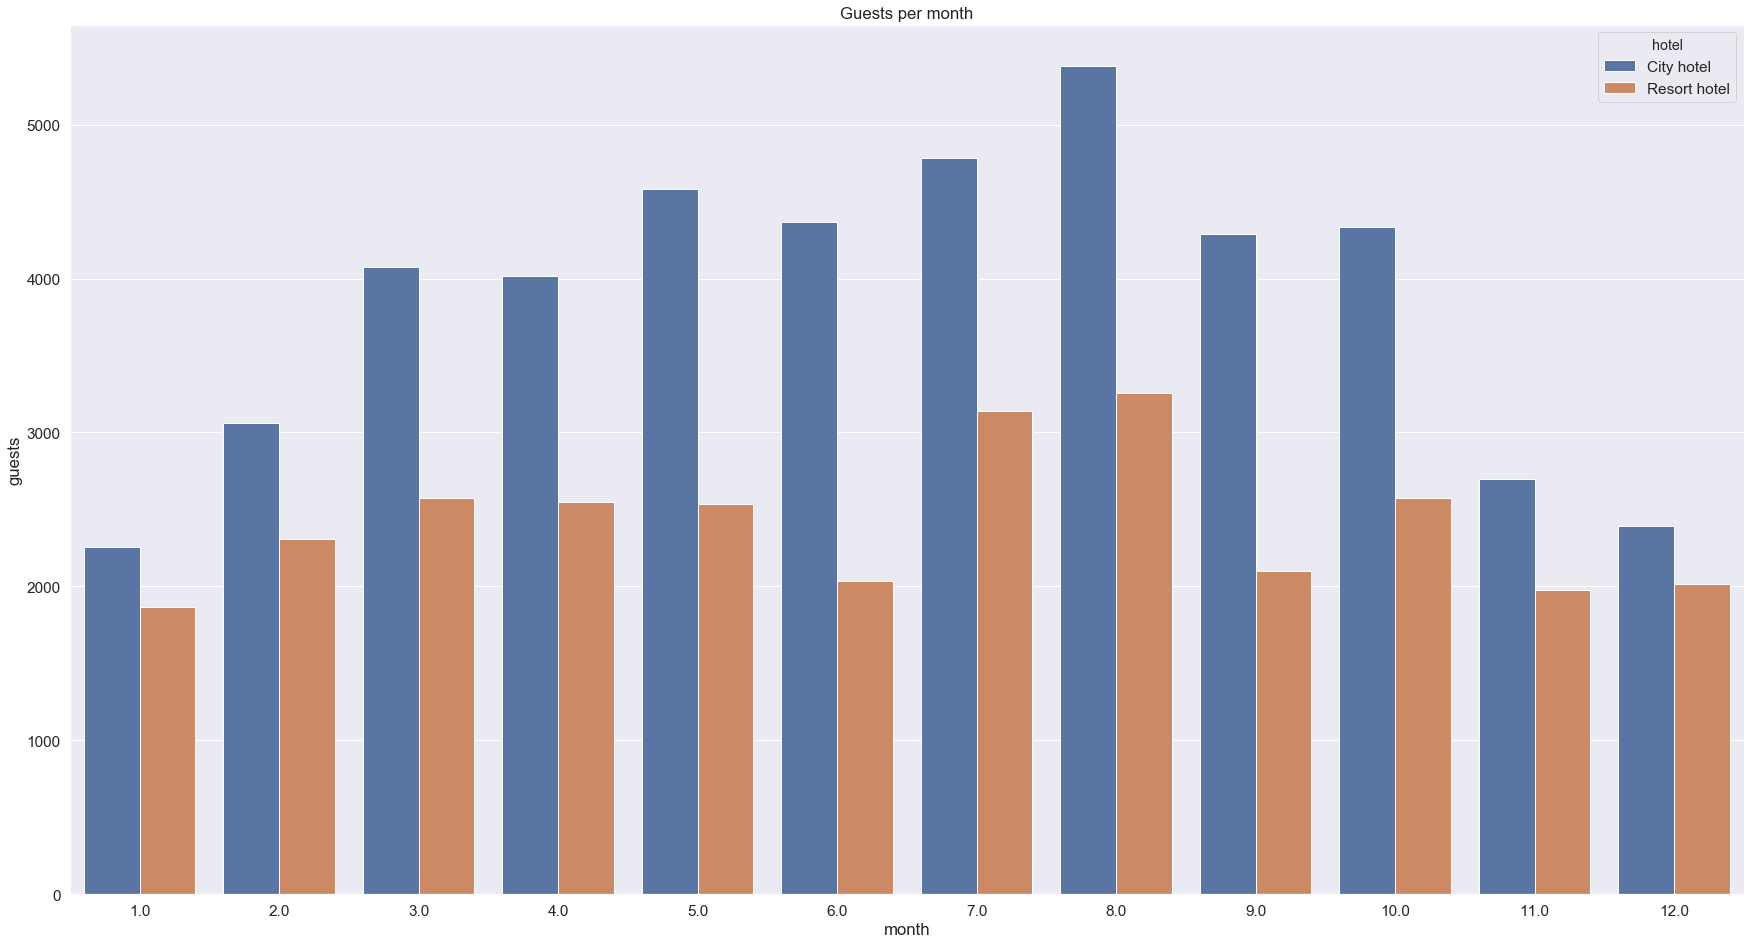

In [33]:
# bar plot of the distribution
plotter()
sns.barplot(x = "month", y="guests", hue="hotel", data=full_guest_data,  hue_order = ["City hotel", "Resort hotel"])
plt.title('Guests per month')

   ### Observation
   From above it can be observed that the prices are higher (over 100/room) during months April to September but still more people travel during these months as the number of guests in City Hotels is over 2000 per months. The prices are lower in the winter months of October through March (less than 100) when the number of travelers decrease. Therefore, as expected we can say that the price of a hotel room is directly proportional to the number of guests. The prices of hotels increase as the demand increases. 
   
   ### Result:
   In order to get cheap prices on hotels, it will be beneficial to make trips during the winter months.
    
    